In [1]:
#import libraries and dependencies
import pandas as pds
import numpy as npy
from sklearn.model_selection import train_test_split
import pickle

In [4]:
#import and read dataset of Dow jones.
dataFrame = pds.read_csv("C:\\Users\\Acer\\Desktop\\Closeing\\DJIA\\DJIA(ClosingVal-tomorrow).csv")

In [5]:
dataFrame.head()

,Date,Open,High,Low,Volume,Close
0,8/11/2008,11729.66992,11867.11035,11675.53027,183190000,11782.34961
1,8/12/2008,11781.70020,11782.34961,11601.51953,173590000,11642.46973
2,8/13/2008,11632.80957,11633.78027,11453.33984,182550000,11532.95996
3,8/14/2008,11532.07031,11718.28027,11450.88965,159790000,11615.92969
4,8/15/2008,11611.20996,11709.88965,11599.73047,215040000,11659.90039


In [8]:
dataFrame.tail()

,Date,Open,High,Low,Volume,Close
1982,6/24/2016,17946.63086,17946.63086,17356.33984,239000000,17400.75000
1983,6/27/2016,17355.21094,17355.21094,17063.08008,138740000,17140.24023
1984,6/28/2016,17190.50977,17409.72070,17190.50977,112190000,17409.72070
1985,6/29/2016,17456.01953,17704.50977,17456.01953,106380000,17694.67969
1986,6/30/2016,17712.75977,17930.60938,17711.80078,133030000,17929.99023


In [9]:
#checking for null values and the total no.of records.
dataFrame.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [10]:
dataFrame.shape

(1987, 6)

In [11]:
#remove date coloumn.
del dataFrame['Date']

In [12]:
#assign x as dataframe.
trainColoumn = dataFrame

In [13]:
# assign X and y to the train and test coloumns.
trainColoumn = npy.array(trainColoumn.drop(['Close'], 1))
testColoumn = npy.array(dataFrame['Close'])

In [14]:
#data spliting and defining.
x_training, x_testing, y_training, y_testing = train_test_split(trainColoumn, testColoumn, test_size=0.2, random_state=42)

In [15]:
#validating the split has correctly divided the dataset.
x_training.shape

(1589, 4)

In [16]:
y_training.shape

(1589,)

In [17]:
x_testing.shape

(398, 4)

In [18]:
y_testing.shape

(398,)

### LASSO

In [19]:
#import Roandom Forest model
from sklearn.linear_model import Lasso

In [20]:
#fitting into the lasso model
lasso = Lasso()
lasso.fit(x_training, y_training)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5416218.491303926, tolerance: 1570869.7193987465
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
#predict target from training data
lasso_predictions = lasso.predict(x_testing)
# lasso_predictions

array([ 8716.40894564, 16946.24164185, 11327.56594555, 14826.00524681,
       17361.94855921, 10315.57137529, 13000.61132379, 17843.25527061,
       15653.51047588, 13423.75216266, 15259.0845877 ,  9876.72801394,
       15413.23465126, 17673.43568701, 12046.92693382, 17071.18201693,
       18022.74636297, 12611.17126246, 10211.87188176,  9158.33024676,
       12578.31570872, 15403.31466435, 10954.89723574, 18041.78981438,
       16213.99976397, 13054.1561443 , 14801.85157069, 12127.49083186,
       12388.70415374,  8300.31911666, 11215.91722321,  8757.53142777,
       15889.73960783, 13226.57564722, 15515.99934827,  8131.79692418,
       13979.87056184, 15189.49095669, 10947.2549766 , 17272.12343608,
       16861.52616144, 10878.36615535,  8148.50814232, 17760.10840349,
       11227.66597783, 15467.35809693, 15266.2086827 , 11151.31317521,
       10273.83275402, 12419.04219492, 16497.91165909, 10286.31666931,
       11264.23947152,  7827.82194154, 17666.56628064, 12562.61436848,
      

In [25]:
def mda(y_testing:npy.ndarray,predicted:npy.ndarray):
    """ Mean Directional Accuracy """
    return npy.mean((npy.sign(y_testing[1:]-y_testing[:-1])== npy.sign(predicted[1:]- predicted[:-1])).astype(int))

In [26]:
def MAPE(y_testing:npy.ndarray,predicted:npy.ndarray):
    """ Mean Absolute Percentage Error """
    mape = npy.mean(npy.abs((y_testing - predicted)/y_testing))*100
    return mape

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, lasso_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, lasso_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, lasso_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, lasso_predictions))
print('Mean Absolute Percentage Error:', MAPE(y_testing,lasso_predictions))

e = MAPE(y_testing,lasso_predictions)
print('%.2f'%e)

Mean Absolute Error: 59.98452197794801
Mean Squared Error: 7728.202913971015
Root Mean Squared Error: 87.91019800893987
Mean Directional Accuracy: 0.9899244332493703
Mean Absolute Percentage Error: 0.49771416181111594
0.50


In [28]:
#dumping the most efficent model
pickle.dump(lasso, open("DWJA_tdysPrediction.pkl", 'wb'))
print('model saved...')

model saved...


### Predicting for 26th March using 25th Open, High, Low, Volume

In [20]:
ls.predict([[32346.81,32672.69,32071.41,411990000]])

array([32390.51095208])

### Graph

In [35]:
import matplotlib.pyplot as plt

In [29]:
newDataFrame=pds.read_csv("C:\\Users\\Acer\\Desktop\\Closeing\\DJIA\\DJIA(DataFrom25March)-Today.csv")

In [30]:
newDataFrame.head()

,Date,Open,High,Low,Volume,Close
0,3/25/2021,32346.81,32672.69,32071.41,411990000.0,32619.48
1,3/26/2021,32681.07,33098.83,32681.07,382170000.0,33072.88
2,3/29/2021,33087.55,33259.00,32905.13,351610000.0,33171.37
3,3/30/2021,33127.88,33170.93,32988.92,307510000.0,33066.96
4,3/31/2021,33116.04,33173.77,32980.57,414140000.0,32981.55


In [31]:
keep_columns=['Open','High','Low','Volume']
new_x_val=newDataFrame[keep_columns]

In [33]:
predictions = lasso.predict(new_x_val)

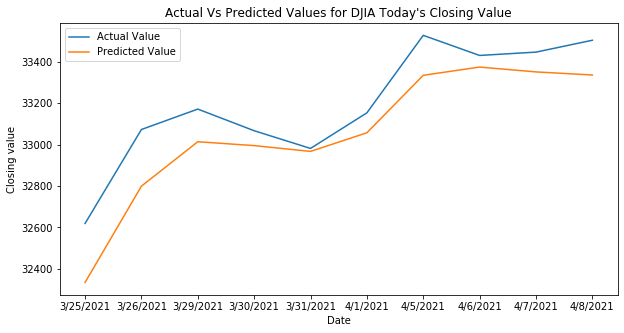

In [37]:
#defing the graph data
plt.figure(figsize=(10,5))
plt.plot(newDataFrame['Date'],newDataFrame['Close'], label ='Actual Value')
plt.plot(newDataFrame['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for DJIA Today's Closing Value")
plt.legend()